# Applied Data Science with Python – Final Project
## __Marketing Campaigns Analysis__

# Project Overview: 

## Objective

This project focuses on analyzing marketing campaign data through the lens of the **Marketing Mix (4 Ps)** — **Product**, **Price**, **Place**, and **Promotion** — to understand what influences **customer acquisition**.

As a data scientist, your role is to perform:
- **Exploratory Data Analysis (EDA)**  
- **Hypothesis Testing**

to uncover insights that can inform more effective marketing strategies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import importlib
from data_wrangling import datawrangling

## 1. Data Wrangling
### Loading the data

In [2]:
df = pd.read_csv('marketing_data.csv');

In [3]:
dfwrangling = datawrangling(df)
dfwrangling.datainspection();


Inspecting the first few rows of the DataFrame.

      ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0         

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


## Step 1: Initial Data Inspection

After importing the dataset, begin by examining key variables to ensure they have been correctly loaded and formatted.

### Key Checks:
- **`Dt_Customer`**: Confirm it is correctly parsed as a date format.
- **`Income`**: Verify that it is numerical and check for any missing or unusual values.

In [5]:
df.columns = df.columns.str.strip()
print(df['Dt_Customer'].isnull().sum()) 
### print(df['Dt_Customer'].unique())
# Convert Dt_Customer to datetime
df['Dt_Customer'] = df['Dt_Customer'].astype(str).str.strip()
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y', errors='coerce')

# Check format
print(df['Dt_Customer'].dtype)
print(df['Dt_Customer'].head())
print(df['Dt_Customer'].unique())
# Remove $ and commas, then convert to numeric
df['Income'] = df['Income'].astype(str).str.replace(r'[\$,]', '', regex=True).astype(float)

# Check Income stats
print(df['Income'].describe())
print(df['Income'].isnull().sum())

0
datetime64[ns]
0   2014-06-16
1   2014-06-15
2   2014-05-13
3   2014-05-11
4   2014-04-08
Name: Dt_Customer, dtype: datetime64[ns]
<DatetimeArray>
['2014-06-16 00:00:00', '2014-06-15 00:00:00', '2014-05-13 00:00:00',
 '2014-05-11 00:00:00', '2014-04-08 00:00:00', '2014-03-17 00:00:00',
 '2014-01-29 00:00:00', '2014-01-18 00:00:00', '2014-01-11 00:00:00',
 '2013-12-27 00:00:00',
 ...
 '2013-06-26 00:00:00', '2013-05-24 00:00:00', '2012-08-15 00:00:00',
 '2013-12-10 00:00:00', '2012-09-19 00:00:00', '2012-08-10 00:00:00',
 '2014-06-06 00:00:00', '2013-05-25 00:00:00', '2013-04-09 00:00:00',
 '2012-09-01 00:00:00']
Length: 663, dtype: datetime64[ns]
count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64
24


### 2. Clean 'Education' and 'Marital_Status' categories (remove extra spaces or inconsistent casing)

In [6]:
print(df['Education'].isnull().sum())
print(df['Marital_Status'].isnull().sum())

0
0


In [7]:
df['Education'] = df['Education'].str.strip().str.title()
df['Marital_Status'] = df['Marital_Status'].str.strip().str.title()

In [8]:

# 2. Group by Education and Marital_Status, then compute mean income
grouped_income = df.groupby(['Education', 'Marital_Status'])['Income'].mean()
print(grouped_income)
missing_income_rows = df[df['Income'].isnull() | (df['Income'] == '')]
print(missing_income_rows)

missing_income_mask = df['Income'].isnull() | (df['Income'].astype(str).str.strip() == '')
print(missing_income_mask)

Education   Marital_Status
2N Cycle    Divorced          49395.130435
            Married           46201.100000
            Single            53673.944444
            Together          44736.410714
            Widow             51392.200000
Basic       Divorced           9548.000000
            Married           21960.500000
            Single            18238.666667
            Together          21240.071429
            Widow             22123.000000
Graduation  Absurd            79244.000000
            Alone             34176.000000
            Divorced          54526.042017
            Married           50800.258741
            Single            51322.182927
            Together          55758.480702
            Widow             54976.657143
Master      Absurd            65487.000000
            Alone             61331.000000
            Divorced          50331.945946
            Married           53286.028986
            Single            53530.560000
            Together       

In [9]:
print(missing_income_mask.head())
print(missing_income_mask.dtype)  # should say: dtype('bool')

0    False
1    False
2    False
3    False
4    False
Name: Income, dtype: bool
bool


## KNN Imputation for Missing Income

To estimate missing values in the `Income` column, we used **K-Nearest Neighbors (KNN) Imputation** with `Education` and `Marital_Status` as predictors.

### Steps:
- Cleaned and encoded categorical features (`Education`, `Marital_Status`)
- Converted `Income` from text (with `$` signs) to numeric format
- Applied `KNNImputer` with 5 neighbors to impute missing values
- Recovered and displayed only the rows that were imputed

In [10]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [11]:
# Sample DataFrame (assuming df exists)
# Step 1: Encode categorical variables
le_edu = LabelEncoder()
le_marital = LabelEncoder()

df['Education_enc'] = le_edu.fit_transform(df['Education'].astype(str))
df['Marital_Status_enc'] = le_marital.fit_transform(df['Marital_Status'].astype(str))

# Step 2: Select columns for imputation
impute_cols = ['Income', 'Education_enc', 'Marital_Status_enc']

# Step 3: Initialize KNN Imputer (e.g. k=5 neighbors)
imputer = KNNImputer(n_neighbors=5)

# Step 4: Fit and transform
imputed_array = imputer.fit_transform(df[impute_cols])

# Step 5: Replace Income with imputed values
df['Income_KNN'] = imputed_array[:, 0]



In [12]:
# Show only the rows that were missing before
missing_income_mask = missing_income_mask.reindex(df.index)
df_imputed = df[missing_income_mask]

# View those rows with their newly imputed Income values
print(df_imputed[['Education', 'Marital_Status', 'Income_KNN']])

# Step 6: (Optional) Drop encoded columns if no longer needed
df.drop(columns=['Education_enc', 'Marital_Status_enc'], inplace=True)

       Education Marital_Status  Income_KNN
134          Phd        Married     56744.0
262   Graduation        Married     35010.6
394          Phd       Together     59010.4
449   Graduation         Single     55486.2
525          Phd        Married     56744.0
590     2N Cycle        Married     30296.4
899       Master       Together     40058.6
997   Graduation         Single     55486.2
1096    2N Cycle         Single     55795.8
1185      Master       Together     40058.6
1213    2N Cycle       Together     36662.6
1312  Graduation         Single     55486.2
1515  Graduation         Single     55486.2
1558  Graduation        Married     35010.6
1693      Master          Widow     65338.0
1804         Phd         Single     70327.4
1858         Phd         Single     70327.4
1863  Graduation        Married     35010.6
1880      Master       Together     40058.6
1967      Master       Together     40058.6
1983  Graduation       Together     77733.8
2139  Graduation         Single 

In [13]:
missing_income_rows = df[df['Income_KNN'].isnull() | (df['Income_KNN'] == '')]
print(missing_income_rows)

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Response, Complain, Country, Income_KNN]
Index: []

[0 rows x 29 columns]


In [14]:
missing_income_rows = df[df['Income'].isnull() | (df['Income'] == '')]
print(missing_income_rows)

         ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
134    8996        1957         Phd        Married     NaN        2         1   
262    1994        1983  Graduation        Married     NaN        1         0   
394    3769        1972         Phd       Together     NaN        1         0   
449    5255        1986  Graduation         Single     NaN        1         0   
525    8268        1961         Phd        Married     NaN        0         1   
590   10629        1973    2N Cycle        Married     NaN        1         0   
899   10475        1970      Master       Together     NaN        0         1   
997    9235        1957  Graduation         Single     NaN        1         1   
1096   4345        1964    2N Cycle         Single     NaN        1         1   
1185   7187        1969      Master       Together     NaN        1         1   
1213   8720        1978    2N Cycle       Together     NaN        0         0   
1312   8557        1982  Gra

## Missing Value Imputation using IterativeImputer

To handle missing values in the `Income` column, we used **Iterative Imputer**, a multivariate imputation method based on chained equations.

### Why IterativeImputer?

Unlike simple mean or KNN imputation, `IterativeImputer` treats each feature with missing values as a dependent variable and models it as a function of the other features. This is especially useful when multiple variables are correlated.

### How it works:

- Uses a regression model to estimate missing values.
- Repeats the process for each feature with missing data in a round-robin fashion.
- Iterates multiple times to improve estimates.

### Features used for Imputation:

- `Education` (encoded as `Education_enc`)
- `Marital_Status` (encoded as `Marital_Status_enc`)
- These variables are encoded numerically using `LabelEncoder`.

### Implementation Steps:

1. Encode categorical variables numerically.
2. Apply `IterativeImputer` to model and fill missing `Income` values.
3. Replace the original `Income` column with the imputed results.

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Step 1: Encode categorical variables
df['Education_enc'] = LabelEncoder().fit_transform(df['Education'].astype(str).str.strip())
df['Marital_Status_enc'] = LabelEncoder().fit_transform(df['Marital_Status'].astype(str).str.strip())


# Step 2: Select numeric columns for imputation
df_numeric = df[['Income', 'Education_enc', 'Marital_Status_enc']]
# Step 3: Apply Iterative Imputer
imp = IterativeImputer(random_state=0)
df_imputed = imp.fit_transform(df_numeric)

# Step 4: Replace original Income ITR with imputed values
df['Income_ITR'] = df_imputed[:, 0]

# Step 4: Replace original Income with imputed values
df['Income'] = df_imputed[:, 0]

missing_income_mask = missing_income_mask.reindex(df.index)
df_imputed = df[missing_income_mask]
# View those rows with their newly imputed Income values
print(df_imputed[['Education', 'Marital_Status', 'Income_ITR', 'Income_KNN','Income']])

       Education Marital_Status    Income_ITR  Income_KNN        Income
134          Phd        Married  55998.995934     56744.0  55998.995934
262   Graduation        Married  50918.369976     35010.6  50918.369976
394          Phd       Together  56902.796932     59010.4  56902.796932
449   Graduation         Single  51370.270475     55486.2  51370.270475
525          Phd        Married  55998.995934     56744.0  55998.995934
590     2N Cycle        Married  45837.744018     30296.4  45837.744018
899       Master       Together  54362.483953     40058.6  54362.483953
997   Graduation         Single  51370.270475     55486.2  51370.270475
1096    2N Cycle         Single  46289.644517     55795.8  46289.644517
1185      Master       Together  54362.483953     40058.6  54362.483953
1213    2N Cycle       Together  46741.545016     36662.6  46741.545016
1312  Graduation         Single  51370.270475     55486.2  51370.270475
1515  Graduation         Single  51370.270475     55486.2  51370

In [16]:
# Step 6: (Optional) Drop encoded columns and temp imputed if no longer needed
df.drop(columns=['Education_enc', 'Marital_Status_enc', 'Income_ITR', 'Income_KNN'], inplace=True, errors='ignore')

## 3. Feature Engineering: Children, Age, Spending, and Purchases

To enhance the dataset, we created new variables that represent key customer attributes and behaviors:

- **Total Number of Children**: The combined count of kids and teenagers living in the household.
- **Age**: The current age of the customer calculated from the birth year.
- **Total Spending**: The aggregate amount spent across multiple product categories.
- **Total Purchases**: The total number of transactions made by the customer across three purchase channels: web, catalog, and store.


In [17]:
df['Total_Children'] = df[['Kidhome', 'Teenhome']].sum(axis=1)

In [18]:
def find_age(birth_date):
    dob_month = pd.to_datetime(birth_date, errors='coerce').month
    dob_day = pd.to_datetime(birth_date, errors='coerce').day
    curent_month = pd.Timestamp('today').month
    current_day = pd.Timestamp('today').day
    age = (pd.Timestamp('today').year - pd.to_datetime('1981-07-30', errors='coerce').year)
    if(dob_month <= curent_month):
        if(current_day<dob_day):
            age = age-1

def find_age_year(year):
    age = (pd.Timestamp('today').year - year)
    return age
            
df['Age'] = df['Year_Birth'].apply(find_age_year)
print(df[['Year_Birth', 'Age']].head())

   Year_Birth  Age
0        1970   55
1        1961   64
2        1958   67
3        1967   58
4        1989   36


In [19]:
# Check for missing values in these columns
# List of columns where you want to fill NaNs with 0
cols_to_fill = [
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

missing_counts = df[cols_to_fill].isna().sum()
print(missing_counts)

NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
dtype: int64


In [20]:
# Fill NaN with 0 in those columns

# If any column has missing values, fill them
if missing_counts.sum() > 0:
    print("Missing values found. Filling NaNs with 0 in relevant columns...")
    df[cols_to_fill] = df[cols_to_fill].fillna(0)
else:
    print("No fillna required. All selected columns are clean.")

No fillna required. All selected columns are clean.


In [21]:
# List of spending columns
spend_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

# Create Total_Spending column
df['Total_Spending'] = df[spend_cols].sum(axis=1)

In [22]:
print(df[['MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Total_Spending']].head())

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       189        104              379              111               189   
1       464          5               64                7                 0   
2       134         11               59               15                 2   
3        10          0                1                0                 0   
4         6         16               24               11                 0   

   MntGoldProds  Total_Spending  
0           218            1190  
1            37             577  
2            30             251  
3             0              11  
4            34              91  


In [23]:
# Create Total_Purchases column
df['Total_Purchases'] = (
    df['NumWebPurchases'] +
    df['NumCatalogPurchases'] +
    df['NumStorePurchases']
)

In [24]:
print(df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Total_Purchases']].head())

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  Total_Purchases
0                4                    4                  6               14
1                7                    3                  7               17
2                3                    2                  5               10
3                1                    0                  2                3
4                3                    1                  2                6


## 4. Distribution Analysis and Outlier Treatment

To understand the distribution of key numeric variables and identify potential outliers, we performed the following steps:

- **Box plots** were used to visually detect outliers.
- **Histograms** were used to assess the distribution shape (e.g., skewness, modality).
- **Outlier treatment** was applied based on the IQR method for variables showing significant skew or extreme values.


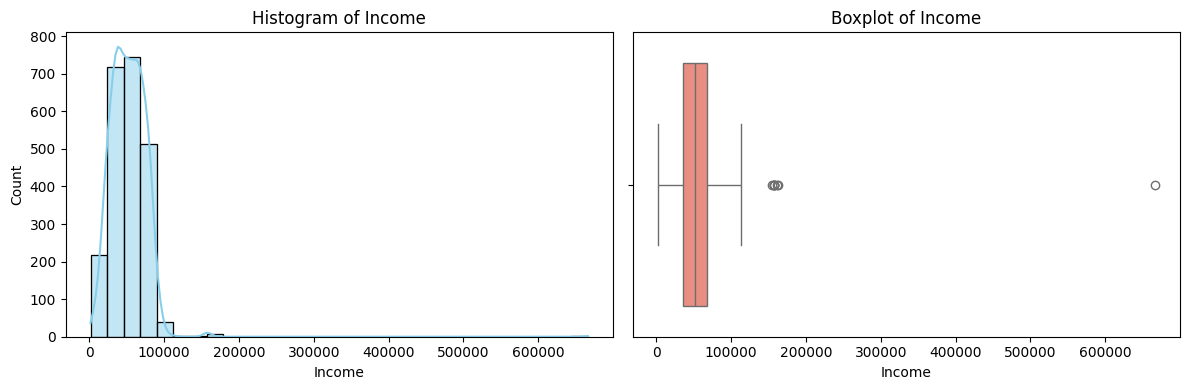

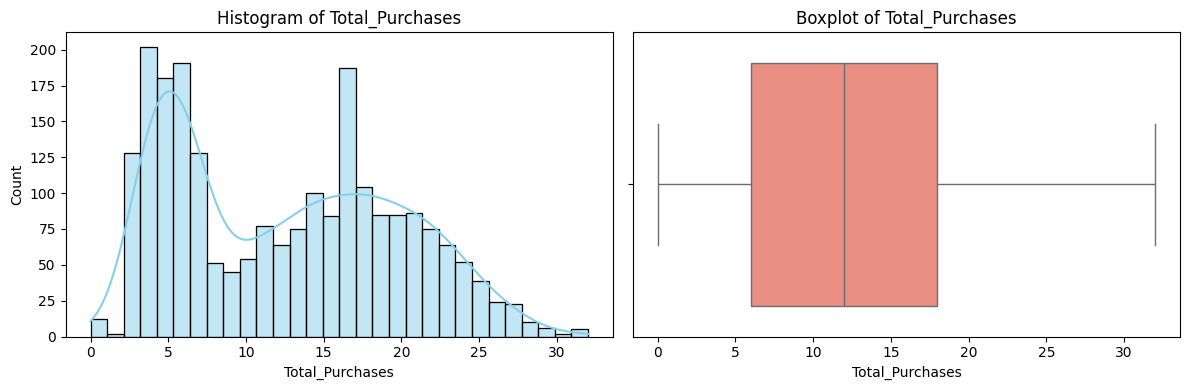

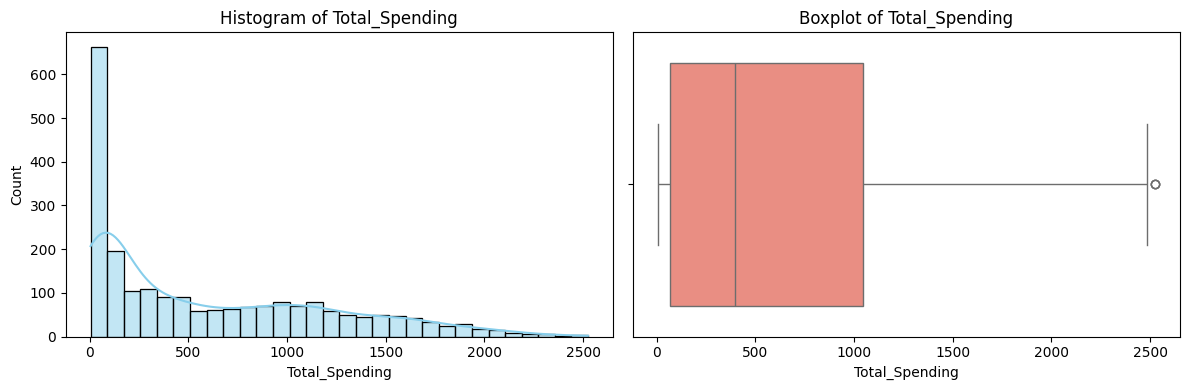

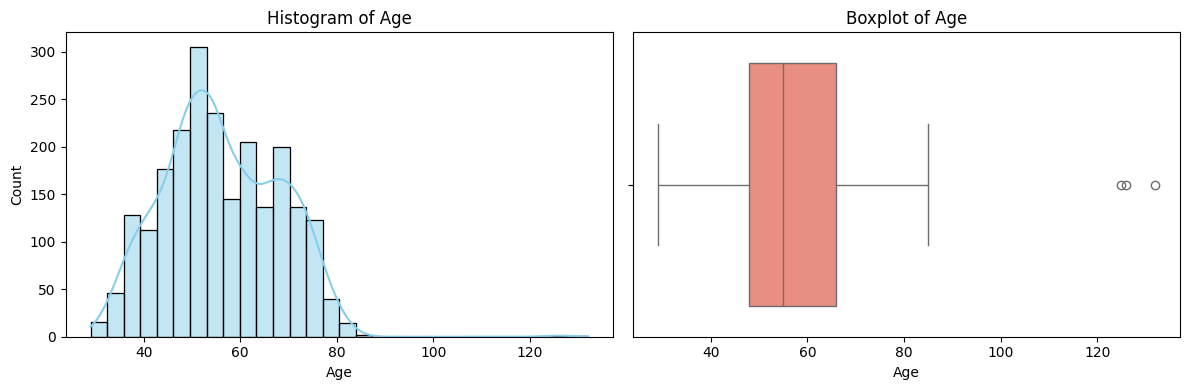

In [25]:

# Choose numerical columns for outlier detection
numeric_cols = [
    'Income', 'Total_Purchases', 'Total_Spending', 'Age'
]

# Step 1: Plot box plots and histograms
for col in numeric_cols:
    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

# Step 2: Outlier treatment using IQR method
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

# Apply outlier capping to each selected column
for col in numeric_cols:
    df[col] = cap_outliers(df[col])


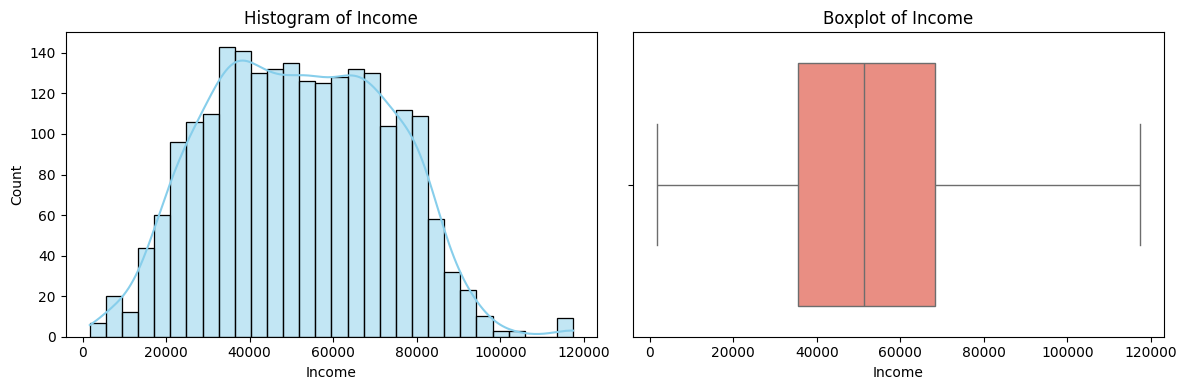

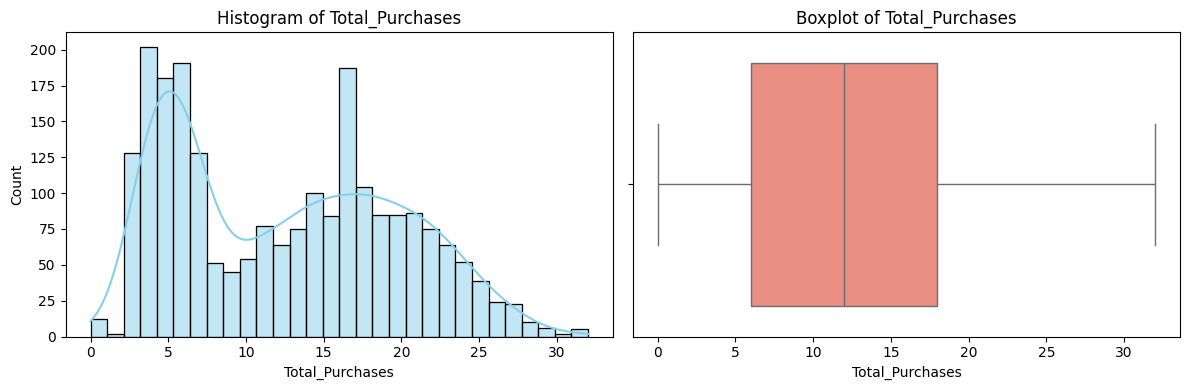

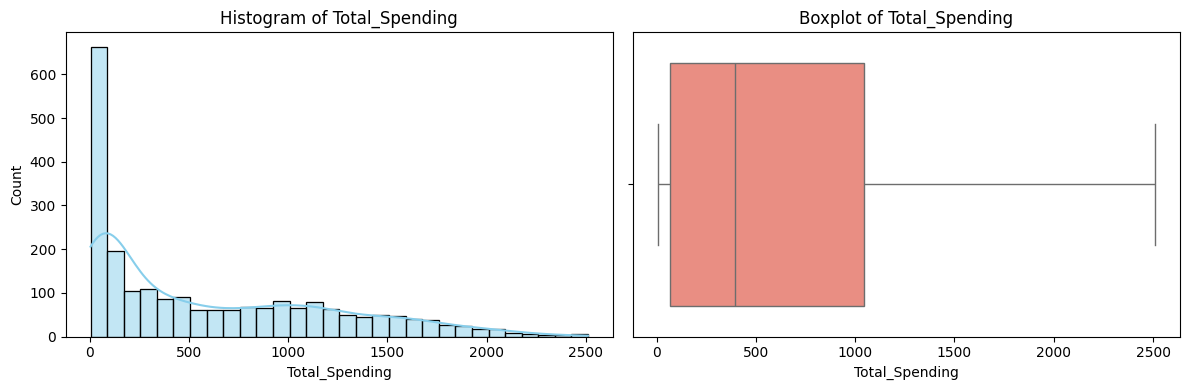

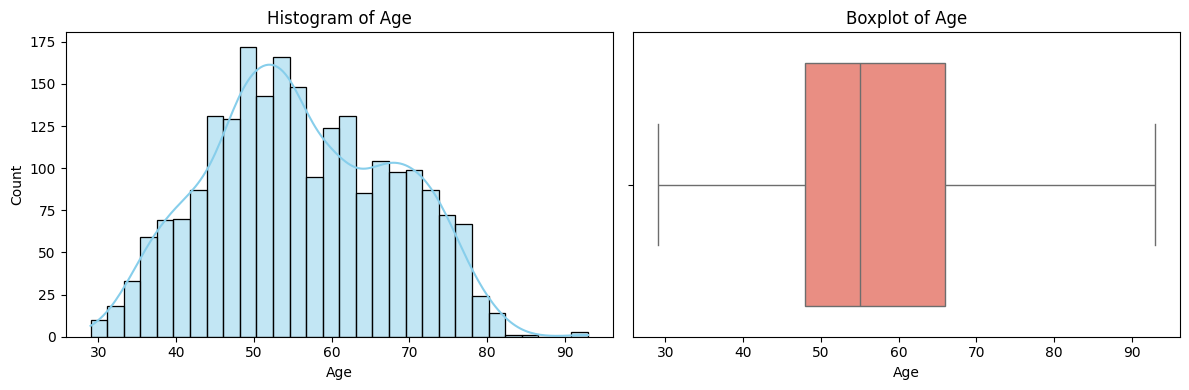

In [26]:
# Step 1: Plot box plots and histograms
for col in numeric_cols:
    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

## 5. Encoding Categorical Variables
To prepare categorical variables for machine learning models, appropriate encoding techniques are applied based on the nature of the variable:

- **Ordinal Encoding**
Used for categorical variables with a meaningful order (e.g., education levels, customer satisfaction levels).

- **One-Hot Encoding**
Used for nominal variables with no inherent order (e.g., marital status, country).

In [27]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# ---- Ordinal Encoding for Education ----
education_order = [df['Education'].dropna().unique().tolist(), df['Marital_Status'].dropna().unique().tolist(), df['Country'].dropna().unique().tolist()]
ordinal_encoder = OrdinalEncoder(categories=education_order)
df[['Education_enc', 'Marital_Status_enc', 'Country_enc']] = ordinal_encoder.fit_transform(df[['Education','Marital_Status', 'Country']])

# ---- One-Hot Encoding for Marital_Status ----
df_encoded = pd.get_dummies(df, columns=['Education','Marital_Status', 'Country'])

# Final encoded dataframe
print(df_encoded)

         ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0      1826        1970  84835.0        0         0  2014-06-16        0   
1         1        1961  57091.0        0         0  2014-06-15        0   
2     10476        1958  67267.0        0         1  2014-05-13        0   
3      1386        1967  32474.0        1         1  2014-05-11        0   
4      5371        1989  21474.0        1         0  2014-04-08        0   
...     ...         ...      ...      ...       ...         ...      ...   
2235  10142        1976  66476.0        0         1  2013-03-07       99   
2236   5263        1977  31056.0        1         0  2013-01-22       99   
2237     22        1976  46310.0        1         0  2012-12-03       99   
2238    528        1978  65819.0        0         0  2012-11-29       99   
2239   4070        1969  94871.0        0         2  2012-09-01       99   

      MntWines  MntFruits  MntMeatProducts  ...  Marital_Status_Widow  \
0          189

In [28]:
print(df.columns.tolist())

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Total_Children', 'Age', 'Total_Spending', 'Total_Purchases', 'Education_enc', 'Marital_Status_enc', 'Country_enc']


In [29]:
print(df[['ID','Education_enc', 'Education', 'Marital_Status_enc','Marital_Status', 'Country_enc', 'Country']].tail())

         ID  Education_enc   Education  Marital_Status_enc Marital_Status  \
2235  10142            1.0         Phd                 0.0       Divorced   
2236   5263            2.0    2N Cycle                 2.0        Married   
2237     22            0.0  Graduation                 0.0       Divorced   
2238    528            0.0  Graduation                 2.0        Married   
2239   4070            1.0         Phd                 2.0        Married   

      Country_enc Country  
2235          2.0      US  
2236          0.0      SP  
2237          0.0      SP  
2238          5.0     IND  
2239          1.0      CA  


In [30]:
df['Marital_Status'].dropna().unique().tolist()

['Divorced',
 'Single',
 'Married',
 'Together',
 'Widow',
 'Yolo',
 'Alone',
 'Absurd']

### 6. Correlation Heatmap

To better understand relationships between numerical features, we generate a heatmap that visualizes the correlation coefficients among them. This helps identify which variables are strongly positively or negatively correlated, aiding in feature selection and identifying multicollinearity.

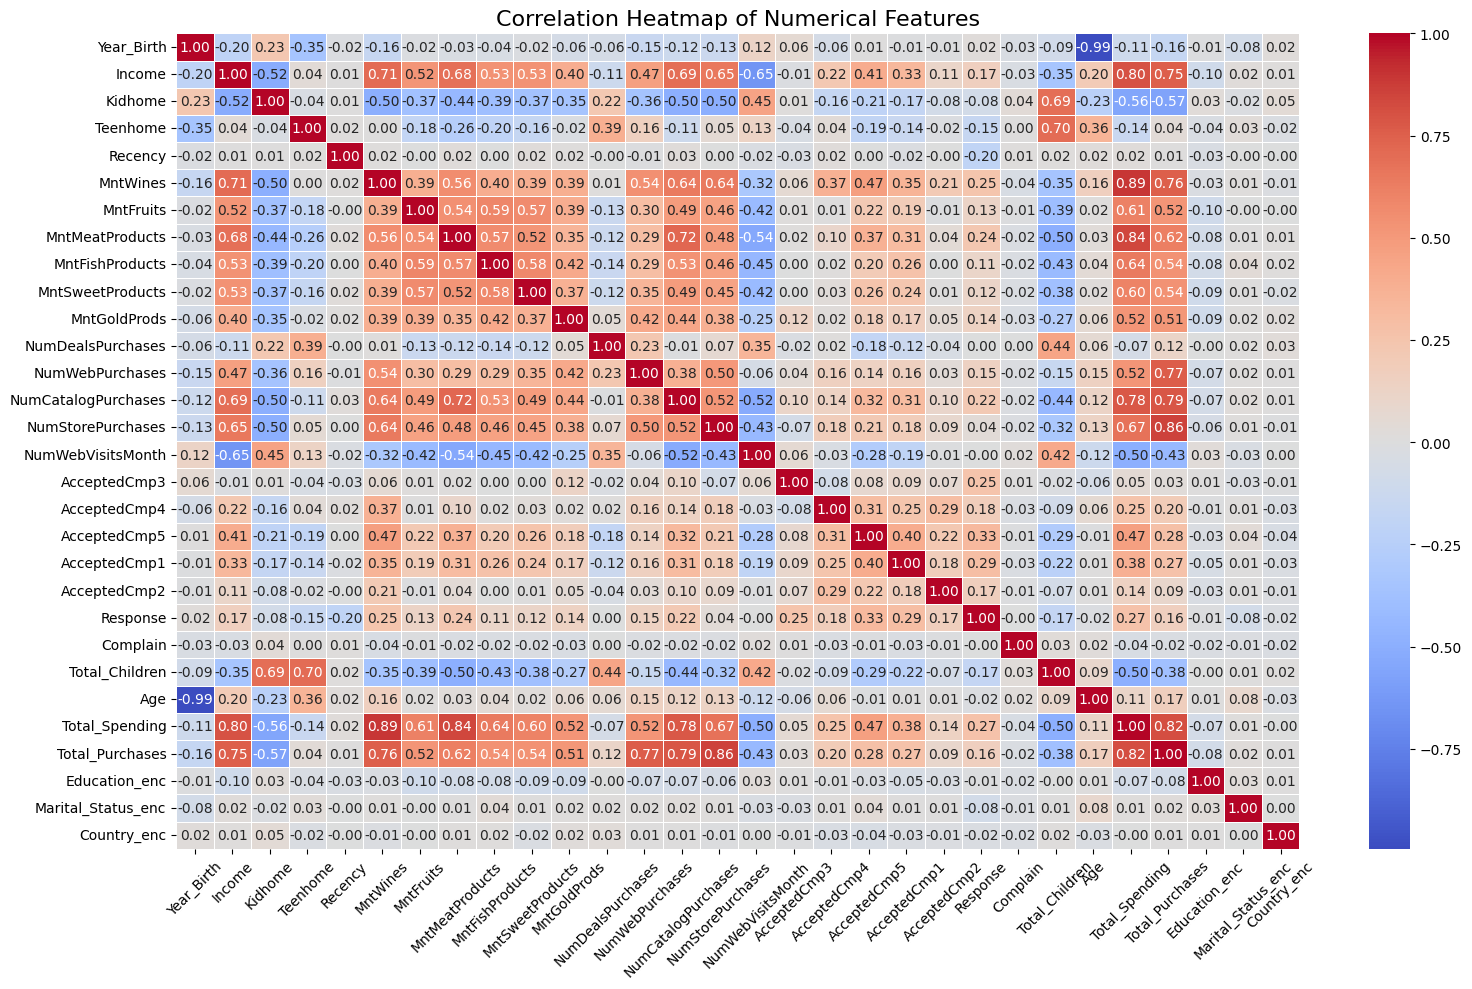

In [31]:
# Select only numerical columns (if not already)
## Since ID is a unique identifier, it should NOT be used for correlation analysis.
numerical_df = df.select_dtypes(include='number').drop(columns=['ID'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Set the plot size and style
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 7. Hypothesis Testing

#### a. Age vs. In-Store Shopping Preference

**Hypothesis Statement:**

- **Null Hypothesis (H₀):** There is no significant difference in in-store purchases between older and younger individuals.
- **Alternative Hypothesis (H₁):** Older individuals make significantly more in-store purchases, indicating a preference for traditional shopping.


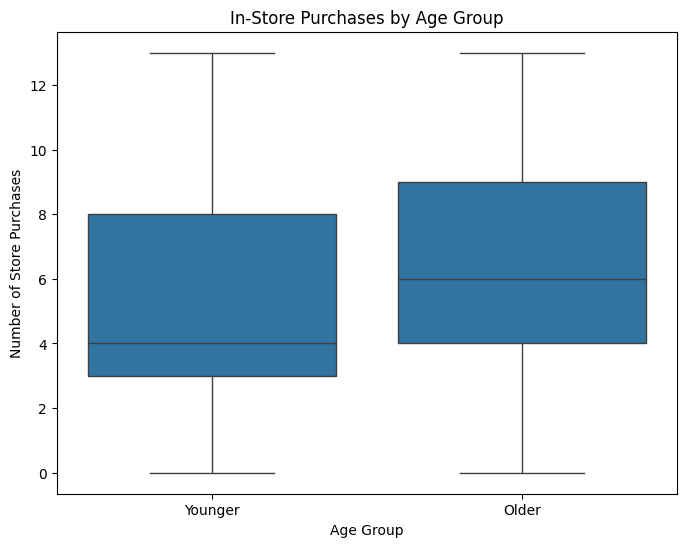

T-statistic: 6.50
P-value: 0.0000
Statistically significant difference — older individuals shop more in-store.


In [32]:
# Create Age column if not done
from scipy.stats import ttest_ind
## df['Age'] = pd.Timestamp('today').year - df['Year_Birth']

# Create age group (you can tune the threshold)
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 59, 100], labels=['Younger', 'Older'])

# Visualize distribution of in-store purchases by age group
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age_Group', y='NumStorePurchases', data=df)
plt.title('In-Store Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Store Purchases')
plt.show()

# Perform independent t-test
older = df[df['Age_Group'] == 'Older']['NumStorePurchases']
younger = df[df['Age_Group'] == 'Younger']['NumStorePurchases']

t_stat, p_val = ttest_ind(older,younger, equal_var=False, nan_policy='omit')

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Statistically significant difference — older individuals shop more in-store.")
else:
    print("No statistically significant difference in in-store shopping by age.")

### B: Customers with Children Prefer Online Shopping

**Hypothesis:**  
Customers with children likely experience time constraints, making online shopping a more convenient option.


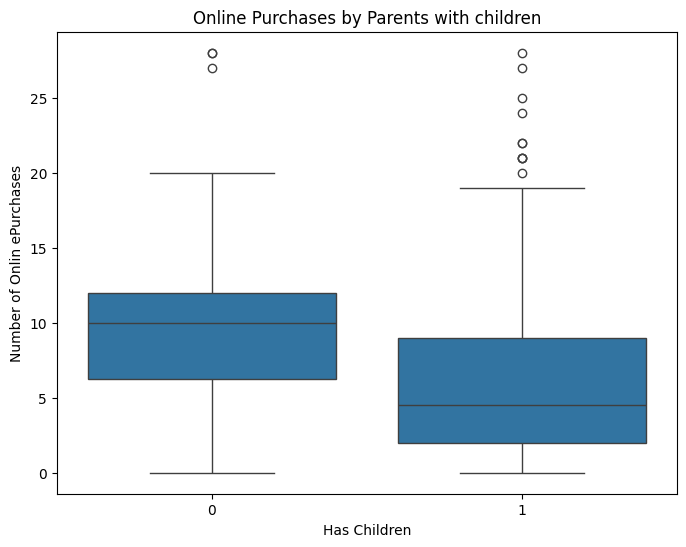

T-statistic: -16.060
P-value: 0.000000
Significant difference: Customers with children shop more online.


In [33]:
# Create Age column if not done
from scipy.stats import ttest_ind

# Create age group (you can tune the threshold)
df['Has_Children'] = np.where(df['Total_Children'] > 0, 1, 0)
## print(df['Has_Children'].value_counts())

# Define total online purchases
df['Online_Purchases'] = df['NumCatalogPurchases'] + df['NumWebPurchases']

# Visualize distribution of in-store purchases by age group
plt.figure(figsize=(8, 6))
sns.boxplot(x='Has_Children', y='Online_Purchases', data=df)
plt.title('Online Purchases by Parents with children')
plt.xlabel('Has Children')
plt.ylabel('Number of Onlin ePurchases')
plt.show()

# Perform independent t-test
parents_with_child = df[df['Has_Children'] == 1]['Online_Purchases']
parents_no_child = df[df['Has_Children'] == 0]['Online_Purchases']

t_stat, p_val = ttest_ind(parents_with_child, parents_no_child, equal_var=False, nan_policy='omit')

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.6f}")

if p_val < 0.05:
    print("Significant difference: Customers with children shop more online.")
else:
    print("No significant difference in online shopping by children status.")

### C: Cannibalization Risk from Alternative Distribution Channels

**Hypothesis Statement:**  
Sales at physical stores may face the risk of cannibalization by alternative distribution channels (e.g., online/catalog shopping).


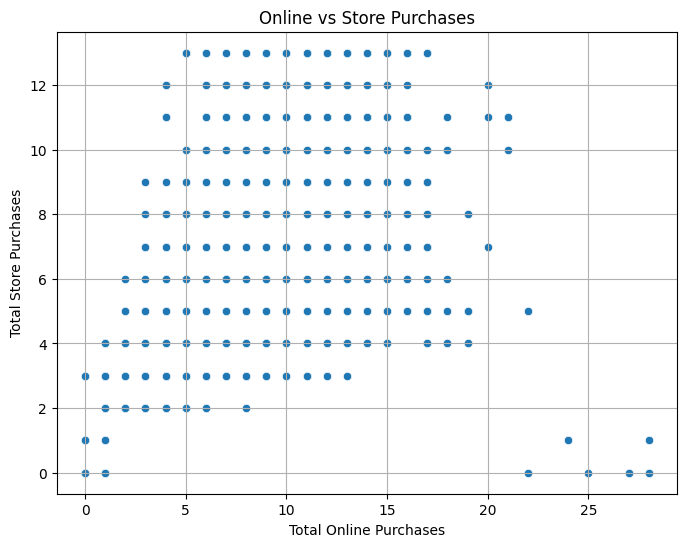

Correlation Matrix:
                   Online_Purchases  Store_Purchases
Online_Purchases          1.000000         0.615359
Store_Purchases           0.615359         1.000000


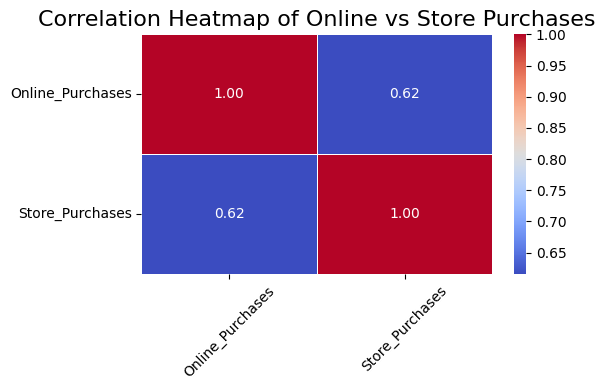

No strong negative correlation — cannibalization unlikely.


In [34]:
# Step 1: Define total purchase channels
df['Store_Purchases'] = df['NumStorePurchases']

# Step 2: Visualize scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Online_Purchases', y='Store_Purchases')
plt.title('Online vs Store Purchases')
plt.xlabel('Total Online Purchases')
plt.ylabel('Total Store Purchases')
plt.grid(True)
plt.show()

# Step 3: Correlation
correlation = df[['Online_Purchases', 'Store_Purchases']].corr()
print("Correlation Matrix:\n", correlation)

# Set the plot size and style
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Online vs Store Purchases', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Interpretation
if correlation.loc['Online_Purchases', 'Store_Purchases'] < 0:
    print("Negative correlation detected — potential cannibalization risk.")
else:
    print("No strong negative correlation — cannibalization unlikely.")

### D: Does the United States Significantly Outperform the Rest of the World in Total Purchase Volumes?

**Hypothesis Statement:**  
Customers from the United States may significantly outperform the rest of the world in total purchase volumes.


In [35]:
print(df['Country'].head())

0     SP
1     CA
2     US
3    AUS
4     SP
Name: Country, dtype: object


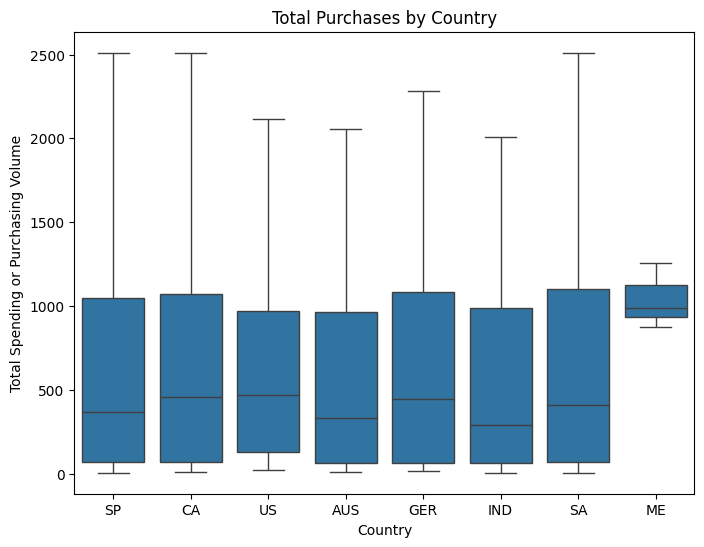

T-statistic: 0.325
P-value: 0.746007
No significant difference found in total purchase volume.


In [36]:

# Create age group (you can tune the threshold)
##df['Has_Children'] = np.where(df['Total_Children'] > 0, 1, 0)
## print(df['Has_Children'].value_counts())

# Define total online purchases
##df['Online_Purchases'] = df['NumCatalogPurchases'] + df['NumWebPurchases']

# Visualize distribution of in-store purchases by age group
plt.figure(figsize=(8, 6))
sns.boxplot(x='Country', y='Total_Spending', data=df)
plt.title('Total Purchases by Country')
plt.xlabel('Country')
plt.ylabel('Total Spending or Purchasing Volume')
plt.show()

# Perform independent t-test
usa_spending = df[df['Country'] == 'US']['Total_Spending']
non_usa_spending = df[df['Country'] != 'US']['Total_Spending']

t_stat, p_val = ttest_ind(usa_spending, non_usa_spending, equal_var=False, nan_policy='omit')

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.6f}")

if p_val < 0.05:
    print("Significant difference: USA has higher purchase volume.")
else:
    print("No significant difference found in total purchase volume.")

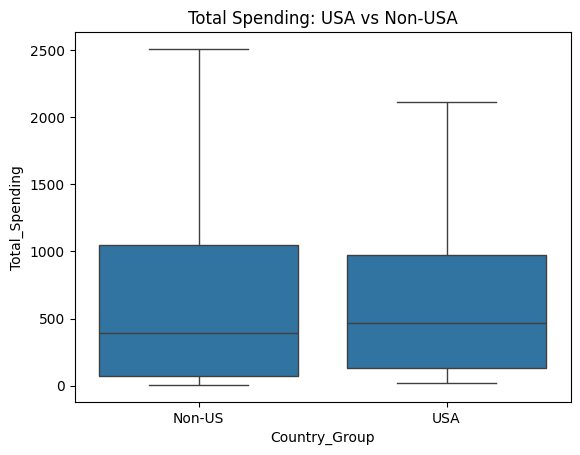

In [37]:
sns.boxplot(x='Country_Group', y='Total_Spending', data=df.assign(
    Country_Group=df['Country'].apply(lambda x: 'USA' if x == 'US' else 'Non-US')
))
plt.title('Total Spending: USA vs Non-USA')
plt.show()

In [38]:
usa_spending.sum()

np.float64(67882.0)

In [39]:
non_usa_spending.sum()

np.float64(1289063.875)

### 8. Data-Driven Insights with Visualizations

#### 8a. Identify the Top-Performing and Lowest Revenue-Generating Products

To determine which product categories are driving the most and least revenue, we examine the total spending across six product types:
- MntWines  
- MntFruits  
- MntMeatProducts  
- MntFishProducts  
- MntSweetProducts  
- MntGoldProds

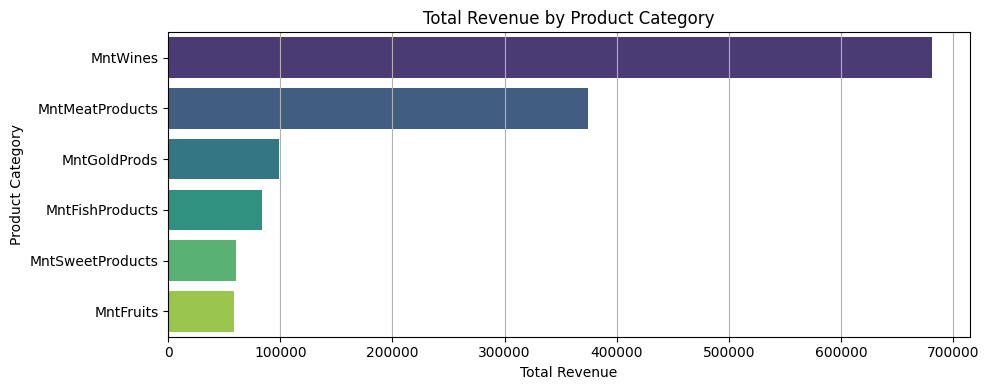

In [40]:
# Select product spending columns
product_columns = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

# Calculate total revenue per product category
product_revenue = df[product_columns].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 4))
sns.barplot(x=product_revenue.values, y=product_revenue.index, palette='viridis', hue=product_revenue.index)
plt.title("Total Revenue by Product Category")
plt.xlabel("Total Revenue")
plt.ylabel("Product Category")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

#### 8b. Examine the Correlation Between Customers' Age and Campaign Response

Here, we analyze if a customer’s age impacts their likelihood of responding positively to the last marketing campaign. The `Response` column (0 = No, 1 = Yes) is compared against `Age` to visualize any correlation. A boxplot will help in observing any age-related trends in campaign effectiveness.

We calculate `Age` from `Year_Birth` and plot age distribution across response types.

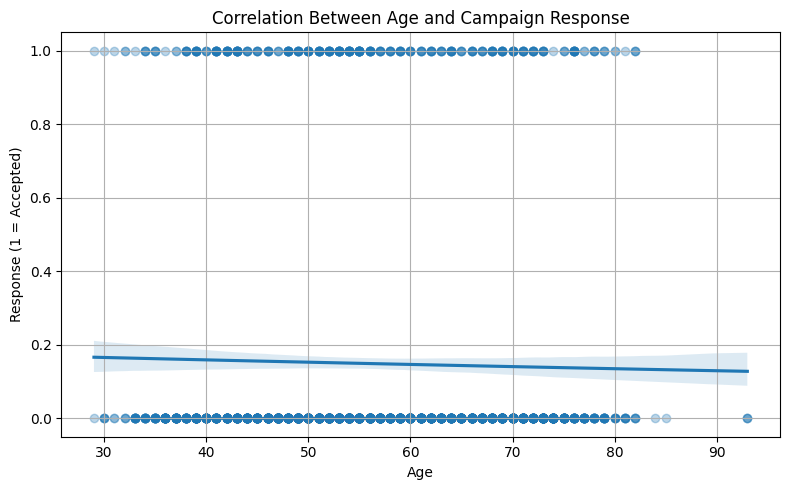

Correlation Matrix:
                Age  Response
Age       1.000000 -0.020058
Response -0.020058  1.000000


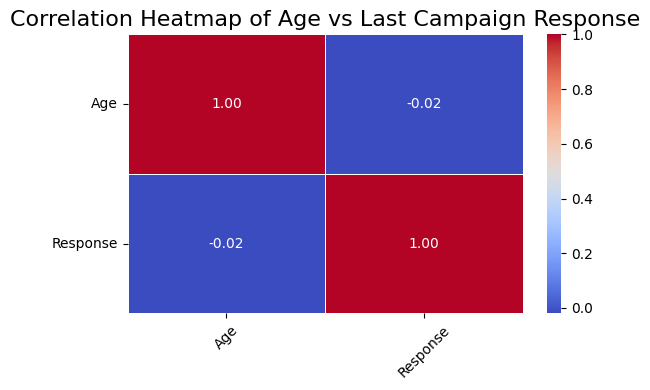

Negative correlation detected — potential cannibalization risk.


In [41]:
# Step 1: Age vs Campaign Response
##df['Store_Purchases'] = df['NumStorePurchases']
plt.figure(figsize=(8, 5))
sns.regplot(x='Age', y='Response', data=df, logistic=True, scatter_kws={'alpha':0.3})
plt.title('Correlation Between Age and Campaign Response')
plt.xlabel('Age')
plt.ylabel('Response (1 = Accepted)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: Correlation
correlation = df[['Age', 'Response']].corr(method='pearson')
print("Correlation Matrix:\n", correlation)

# Set the plot size and style
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Age vs Last Campaign Response', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Interpretation
if correlation.loc['Age', 'Response'] < 0:
    print("Negative correlation detected — potential cannibalization risk.")
else:
    print("No strong negative correlation — cannibalization unlikely.")

### c. Determine the country with the highest number of customers who accepted the last campaign

Filter the dataset for customers who responded positively (`Response == 1`), then count the number of such customers by country to identify which country had the highest campaign acceptance.


In [42]:
# Filter customers who accepted the last campaign (Response == 1)
accepted_customers = df[df['Response'] == 1]

# Count accepted customers by country
accepted_counts = accepted_customers['Country'].value_counts()

# Get country with highest number of accepted customers
top_country = accepted_counts.idxmax()
top_count = accepted_counts.max()

print(f"The country with the highest number of customers who accepted the last campaign is {top_country} with {top_count} customers.")

# Optional: display full counts
print("\nAccepted Customers by Country:")
print(accepted_counts)

The country with the highest number of customers who accepted the last campaign is SP with 176 customers.

Accepted Customers by Country:
Country
SP     176
SA      52
CA      38
AUS     23
GER     17
IND     13
US      13
ME       2
Name: count, dtype: int64


### d. Investigate the relationship between number of children at home and total expenditure

We will create a new variable representing the total number of children at home by summing `Kidhome` and `Teenhome`. Then, analyze how total spending varies with this variable using descriptive statistics and visualization.

   Total_Children  Total_Spending
0               0     1105.963754
1               1      472.733156
2               2      245.947743
3               3      274.603774


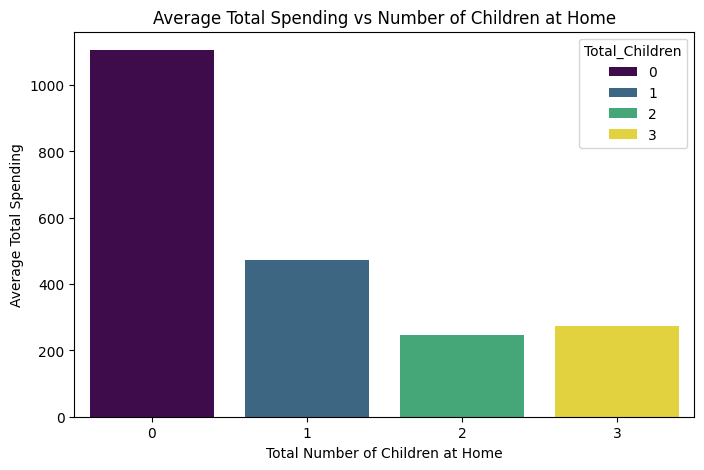

In [43]:
# Group by total children and calculate average total spending
spending_by_children = df.groupby('Total_Children')['Total_Spending'].mean().reset_index()

print(spending_by_children)

# Visualize with bar plot

plt.figure(figsize=(8,5))
sns.barplot(x='Total_Children', y='Total_Spending', data=spending_by_children, palette='viridis', hue='Total_Children')
plt.title('Average Total Spending vs Number of Children at Home')
plt.xlabel('Total Number of Children at Home')
plt.ylabel('Average Total Spending')
plt.show()

### e. Analyze the educational background of customers who lodged complaints in the last two years

Filter customers who have lodged complaints (`Complain` > 0), then examine the distribution of their education levels.

Education levels of customers who lodged complaints:
Education
Graduation    14
2N Cycle       4
Master         2
Phd            1
Name: count, dtype: int64


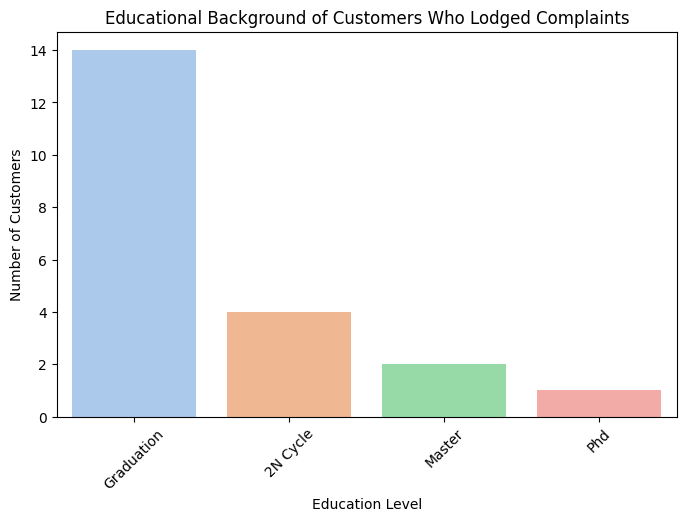

In [44]:
# Filter customers who lodged complaints
complainers = df[df['Complain'] == 1]

# Count education levels among complainants
education_counts = complainers['Education'].value_counts()

print("Education levels of customers who lodged complaints:")
print(education_counts)

# Visualize with bar plot
# Create DataFrame from the counts
education_df = education_counts.reset_index()
education_df.columns = ['Education', 'Count']

plt.figure(figsize=(8,5))
sns.barplot(x='Education', y='Count', data = education_df, palette='pastel', hue = 'Education' )
plt.title('Educational Background of Customers Who Lodged Complaints')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [45]:
print(df.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   51876.364334     0.444196     0.506250   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51371.635237     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  117416.250000     2.000000     2.000000   
std     3246.662198    11.984069   20938.537566     0.538398     0.544538   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857142784    49.109375   303.935714    26.302232   
min              2012-07-30 00:00:00     0.000000     0.000000     0.

In [46]:
df.to_csv('cleaned_marketing_data.csv', index=False)